# Método de Numerov

In [135]:
from pylab import *
from numpy import *
%matplotlib inline
from matplotlib import gridspec
from scipy.special import *

Método numérico que sirve para integrar ecuaciones de segundo orden de la forma
$$
\frac{d^2\psi}{dx^2}+k(x)\psi(x) = s(x)
$$

en un dominio [x_0,x_f]. Se toman un conjunto de puntos en este dominio,${x_n}$ igualmente espaciados (es decir $x_{n+1} = x_n + h$, con h algún paso constante). Si nombramos $k_{n} = k(x_n), s_{n} = s(x_n) , \psi_{n+1}= \psi(x_{n+1}) $, entonces $\psi_{n+1}$ en términos de cantidades evaluadas en $x_n$ y $x_{n+1}$ es:

$$
\psi_{n+1}= \frac{2(1-\frac{5}{12}h^2k_n)\psi_n-(1+\frac{1}{12}h^2k_{n-1})\psi_{n-1}+\frac{h^2}{12}(s_{n+1}+10s_n+s_{n-1})+O(h^6)}{1+\frac{1}{12}h^2 k_{n+1}}
$$



Se puede resolver también problemas de potencial central en 3D,  ya que para estos la función de onda es:

$$
\psi(x) = R(r) Y^l_m(\theta,\phi)
$$

con $R(r)$ resolviendo la ecuación

$$
\frac{d^2R}{dr^2}+2(E-V_E(r))R(r) = 0 
$$

y   $V_E = V(r)+ \frac{l(l+1)}{r^2}$



# Derivación

Expandimos la función alrededor de un punto $x_0$:
$$
\psi(x) = \psi(x_0) + (x-x_0)\psi'(x_0)+ \frac{(x-x_0)^2}{2!} \psi''(x_0)+ \frac{(x-x_0)^3}{3!} \psi'''(x_0)+ \frac{(x-x_0)^4}{4!} \psi''''(x_0) +\frac{(x-x_0)^5}{5!} \psi'''''(x_0)+ O(h^6)
$$

Denotamos por $h =x-x_0$ y escribimos lo anterior como

$$
\psi(x_0+h) = \psi(x_0) + h\psi'(x_0)+ \frac{h^2}{2!} \psi''(x_0)+ \frac{h^3}{3!} \psi'''(x_0)+ \frac{h^4}{4!} \psi''''(x_0) +\frac{h^5}{5!} \psi'''''(x_0)+ O(h^6)
$$

Discretizamos el espacio en un conjunto de puntos ${x_n}$ con separación h. Tomando en cuenta la expresión anterior, las expresiones de $\psi_{n+1}$ y $\psi_{n-1}$ en términos de $\psi_{n}$ son:
 $$
\psi_{n+1} = \psi_{n} + h\psi'_{n}+ \frac{h^2}{2!} \psi''_{n}+ \frac{h^3}{3!} \psi'''_{n}+ \frac{h^4}{4!} \psi''''_{n} +\frac{h^5}{5!} \psi'''''_{n}+ O(h^6)
$$

 $$
\psi_{n-1} = \psi_{n} - h\psi'_{n}+ \frac{h^2}{2!} \psi''_{n}- \frac{h^3}{3!} \psi'''_{n}+ \frac{h^4}{4!} \psi''''_{n} -\frac{h^5}{5!} \psi'''''_{n}+ O(h^6)
$$

Sumando las dos expresiones anteriores:
 $$
\psi_{n-1} + \psi_{n+1} = 2\psi_{n} + 2\frac{h^2}{2!} \psi''_{n}+ 2\frac{h^4}{4!} \psi''''_{n} + O(h^6)
$$

Podemos sustituir $\psi_n''=-k_n\psi_n+s_n$  y  $\psi_n''''=\frac{d^2}{dx^2}(-k(x)\psi(x)+s(x))|_{x = x_n} =\frac{d}{dx}(-k'(x)\psi(x)-k(x)\psi'(x)+s'(x))|_{x = x_n} = (-k''(x)\psi(x)-2k'(x)\psi'(x)-k(x)\psi''(x)+s''(x))|_{x = x_n}$

Sustituyendo esto en la expresión anterior (?) llegamos a la ecuación final

# Ecuación de Schrödinger en 1D

La ecuación de Schrödinger en 1D,  trabajando con unidades tales que $\hbar= m = 1$, es 

$$
\frac{d^2\psi}{dx^2}+2(E-V(x))\psi(x) = 0
$$

Para resolver el problema se debe de considerar adicionalmente condiciones de frontera, que generalmente se cumplirán sólo para ciertos valores de E


A continuación se programa una primera versión del método (pensando que conocemos el espectro del potencial)

In [136]:
def Norma(f,h):  #Calcula la norma de un arreglo con espaciado i
    
    norma = 0
    
    for i in range(len(f)):
        norma += h * f[i] * conjugate(f[i])
        
    norma = sqrt(norma)
    
    return norma

In [137]:
def Numerov(V, intervalo, E, cond_ini, args ="0", h=0.01, error = 1):  
    
    # V = V(x) es el potencial
    # intervalo = [x_l,x_r], puntos alejados donde pueda suponerse \psi(x) = 0
    # E = E es e la energía
    # cond_ini = [sol_0, sol_1], soluciones en los primeros dos puntos iniciales
    
    x = arange(intervalo[0], intervalo[1]+h ,h)  
    sol = zeros(len(x))
    sol[0] = cond_ini[0]
    sol[1] = cond_ini[1]
    N = 0                 # Etiquetá que se usará al final
    
    if args=="0":
        for j in range(len(x)-2):
                i = j+1
                
                k0 =  -2. * (V(x[i]) - E)           # K(x) = k^2= -2(V(x)-E); este es el punto del centro
                km1 = -2. * (V(x[i-1]) - E)        # punto desplazado en K
                kp1 = -2. * (V(x[i+1]) - E)        # punto desplazado en K
                
                f0 = 1 + k0  * (h**2)/12.
                fm1= 1 + km1 * (h**2)/12.
                fp1= 1 + kp1 * (h**2)/12.
                
                sol[i+1] = ((12-10*f0) * sol[i] - fm1 * sol[i-1]) / fp1
                
    else:
        for j in range(len(x)-2):
                i = j+1
                
                k0 =  -2. * (V(x[i],args) - E)
                km1 = -2. * (V(x[i-1],args) - E)
                kp1 = -2. * (V(x[i+1],args) - E)
                
                f0 = 1 + k0  * (h**2)/12.
                fm1= 1 + km1 * (h**2)/12.
                fp1= 1 + kp1 * (h**2)/12.
                
                sol[i+1] = ((12-10*f0) * sol[i] - fm1 * sol[i-1]) / fp1
    
    norma = Norma(sol,h)        #Se normaliza la función de onda
    sol = array(sol)/norma
        
    if abs(sol[-1])>error:
        N = "Error"
        
    return x, sol, N

 ¿Qué pasa si no se conoce el espectro de energías del potencial a resolver?

¿Qué pasa, por ejemplo, si tratamos de resolver la ecuación de Schrödinger con un valor de E que no se encuentra en el espectro de energías? La ecuación no tendrá una solución tal que se cumplan las condiciones de frontera . Se usará el método de Numerov, pero esta vez se le dará al programa un arreglo de energías con las cuales se deberá de integrar la ecuación. Si existe solución aceptable entonces la energía y la función serán guardadas.



In [143]:
def  Numerov_ii(V, intervalo, Energias, cond_ini , metodo, Nodos, args = "0", h=0.01, prec = .1 ,error = .01):
   
    # V = V(x) es el potencial
    # intervalo = [x_l,x_r], puntos alejados donde pueda suponerse \psi(x) = 0
    # Energias = [E_0, E_1]  es el rango de energías a operar
    # cond_ini = [sol_0, sol_1], soluciones en los primeros dos puntos iniciales 
    # metodo = "algo" es el método a utilizar
    # Nodos = n (un número) que es equivalente al número cuántico principal (o al nivel energético)
    # prec = n   es la precisicíon a utilizar  
    
    if metodo == "Trivial":   #Este método inocente pone fe en que eventualmete una solución 
        espectro = []         # del intervalo va a tener frutos.
        funciones = []
        E = arange(Energias[0],Energias[1]+prec, prec) #Calculamos un arreglo de energías llamado E
        
        for k in range(len(E)):  # Aquí se aplica Numerov yse escogen los valores que funcionan
            x, solucion, N =  Numerov(V,intervalo, E[k], cond_ini, args, h, error) 
            if N != "Error":
                espectro.append(E[k])
                funciones.append(solucion)

                
                
    if metodo == "Shooting":                        #Parecido al método de biyección para encontrar raíces
        espectro = 0                                # cada vez que se tiene el una energía con más o menos 
        x = arange(intervalo[0], intervalo[1]+h ,h) # nodos de los esperados, significa que la energía
        funciones = zeros(len(x))                   # es distinta a la esperada (y por eso debe cambiarse su valor)
                                      
  
        while Energias[1]-Energias[0] > prec:
            
            E = (Energias[1]+Energias[0])/2.  #Se escribe una variable local E para la energía media del 
            nodos = 0                         #intervalo. También una variable para lo nodos que salgan
            sol = zeros(len(x))               # Da únicamente la sol del nivel pedido, si se quieren hacer 
            sol[0] = cond_ini[0]              # muchas se pone en un ciclo for. 
            sol[1] = cond_ini[1]
            #k = 0   #ESTO NO ES NECESARIO, O SÍ?
            
            for j in range(len(x)-2):
                i = j+1
                    
                k0  = -2. * (V(x[i]) - E)
                km1 = -2.* (V(x[i-1]) - E)
                kp1 = -2.* (V(x[i+1]) - E)
                    
                f0  = 1 + k0  * (h**2)/12.
                fm1 = 1 + km1 * (h**2)/12.
                fp1 = 1 + kp1 * (h**2)/12. 
                    
                sol[i+1] = ((12- 10 * f0) * sol[i] - fm1 * sol[i-1]) / fp1                   
                    
                if (sol[i+1] * sol[i]) < 0:  #Contabilizar nodos
                        nodos += 1
                        
            if  nodos > Nodos:          #Prueba para saber si la energía es muy alta
                        Energias = [Energias[0],E]
                        
            elif nodos < Nodos:         #Prueba para saber si la energía es muy baja
                Energias = [E,Energias[1]]
                
            elif nodos == Nodos:        #Prueba para tener la energía aceptable
                if abs(sol[-1])<h:
                    break
                    
                En = Energias[(-1)**nodos]    #ORIGINALMENTE DECÍA [(-1)**k*1], pero k = 0
                if En - E < 0:
                    Energias = [En,E]
                else:
                    Energias = [E,En]
                        
        norma = Norma(sol,h)        #Se normaliza la función de onda
        funciones = array(sol)/norma

        espectro = E
        
        
    if metodo == "Matching":
        espectro = 0
        funciones = 0
        error =1e-4
        E = (Energias[1]+Energias[0])/2.  #Se escribe una variable local E para la energía media del 
        
        for i in range(len(E)):
            x = arange(intervalo[0], intervalo[1]+h ,h)           #Se declara el intervalo de integreción
            sol_izq = zeros(len(x))                               # La sol que corre de izq a der
            sol_der = zeros(len(x))                               # La sol que corre de der a izq
            sol = zeros(len(x))                                   # La sol de todo el intervalo
            
            sol_izq[0], sol_der[-1] = cond_ini[0], cond_ini[0]    #Condiciones para mabas funciones
            sol_izq[1], sol_der[-2] = cond_ini[1], cond_ini[1]    #Se asume que son intervalos simétricos
            
            #x_der = x[-1]                 #PAra encontrar en tourning point desde la derecha
            x_inv = (x[0]-x[-1]) / 2.                             #Punto donde se encontrarán las sols.
           
            y_izq, y_der = (V(x[0]) - E[i]), (V(x[-1]) - E[i])
            #n= 0
            while abs(x_inv - x[-1]) >= error and abs(y_izq - y_der) >= error :
                y_inv =  (V(x_inv) - E[i])
                if y_inv == 0:
                    break
                elif (y_inv * y_izq) < 0:
                    x_der = x_inv
                else:
                    x_izq = x_inv
                y_inv = (x_izq + x_der) / 2.
                y_izq , y_der = (V(x_izq) - E[i]), (V(x_der) - E[i])
                # Y ya se determina el punto de inversión x_inv
#                n+=1
#            print(pto_inv)

            x_d, sol_izq, N =  Numerov(V,[x[0],x_inv], E[i], cond_ini, args, h, error)
        
    return espectro,x,funciones

# Oscilador Armónico (con energías desconocidas)

Notemos que para aplicar el método es necesario conocer primero los niveles de energía del sistema que se está tratando. En esta sección usamos el oscilador para comprobar que el método de Numerov funciona. Programamos el potencial,

$$
V(x) = \frac{m \omega^2 x^2}{2}
$$

$$
E_n = \hbar \omega (n+\frac{1}{2})
$$
 Donde las fucniones de onda son:
$$
\psi_n = (\frac{\alpha}{\pi})^{\frac{1}{4}}\frac{1}{\sqrt{2^n n!}} H_n(x) e^{-x^2/2}  
$$

con $\alpha = \frac{m \omega}{\hbar}$

In [144]:
omega = 1

def V_oscilador(x,w = omega):
    V = (w**2)*(x**2)/2
    return V

def E_oscilador(n,w = omega):
    E = w*(n+0.5)
    return E

def funcion_osc(x,n):
    psi = (pi**(-1./4.))*(hermite(n)(x)*exp(-(x**2)/2))/sqrt((2**n)*factorial(n))
    return  psi   

In [145]:
E = [0.1,1]
x_0 = -4
x_1 = 4

#Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Matching",0,args = "0",h=0.01,prec = 10**(-4) ,error = 1)

Resolvemos ahora para el estado base y los 3 primeros estados excitados.

In [146]:
E = [0.4,4]  #Intervalo de energías

x_0, x_1 = -4, 4  #Intervalo donde se resolvera la ec.

Energias, x, funciones = Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Trivial",1,args = "0",h=0.1,prec= .01 ,error = .1)

e_s = []
f_s = []
for i in range(6):
    en, xs, f = Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Shooting",i,args = "0",h=0.01,prec = 1e-4 ,error = .1)
    e_s.append(en)
    f_s.append(f)

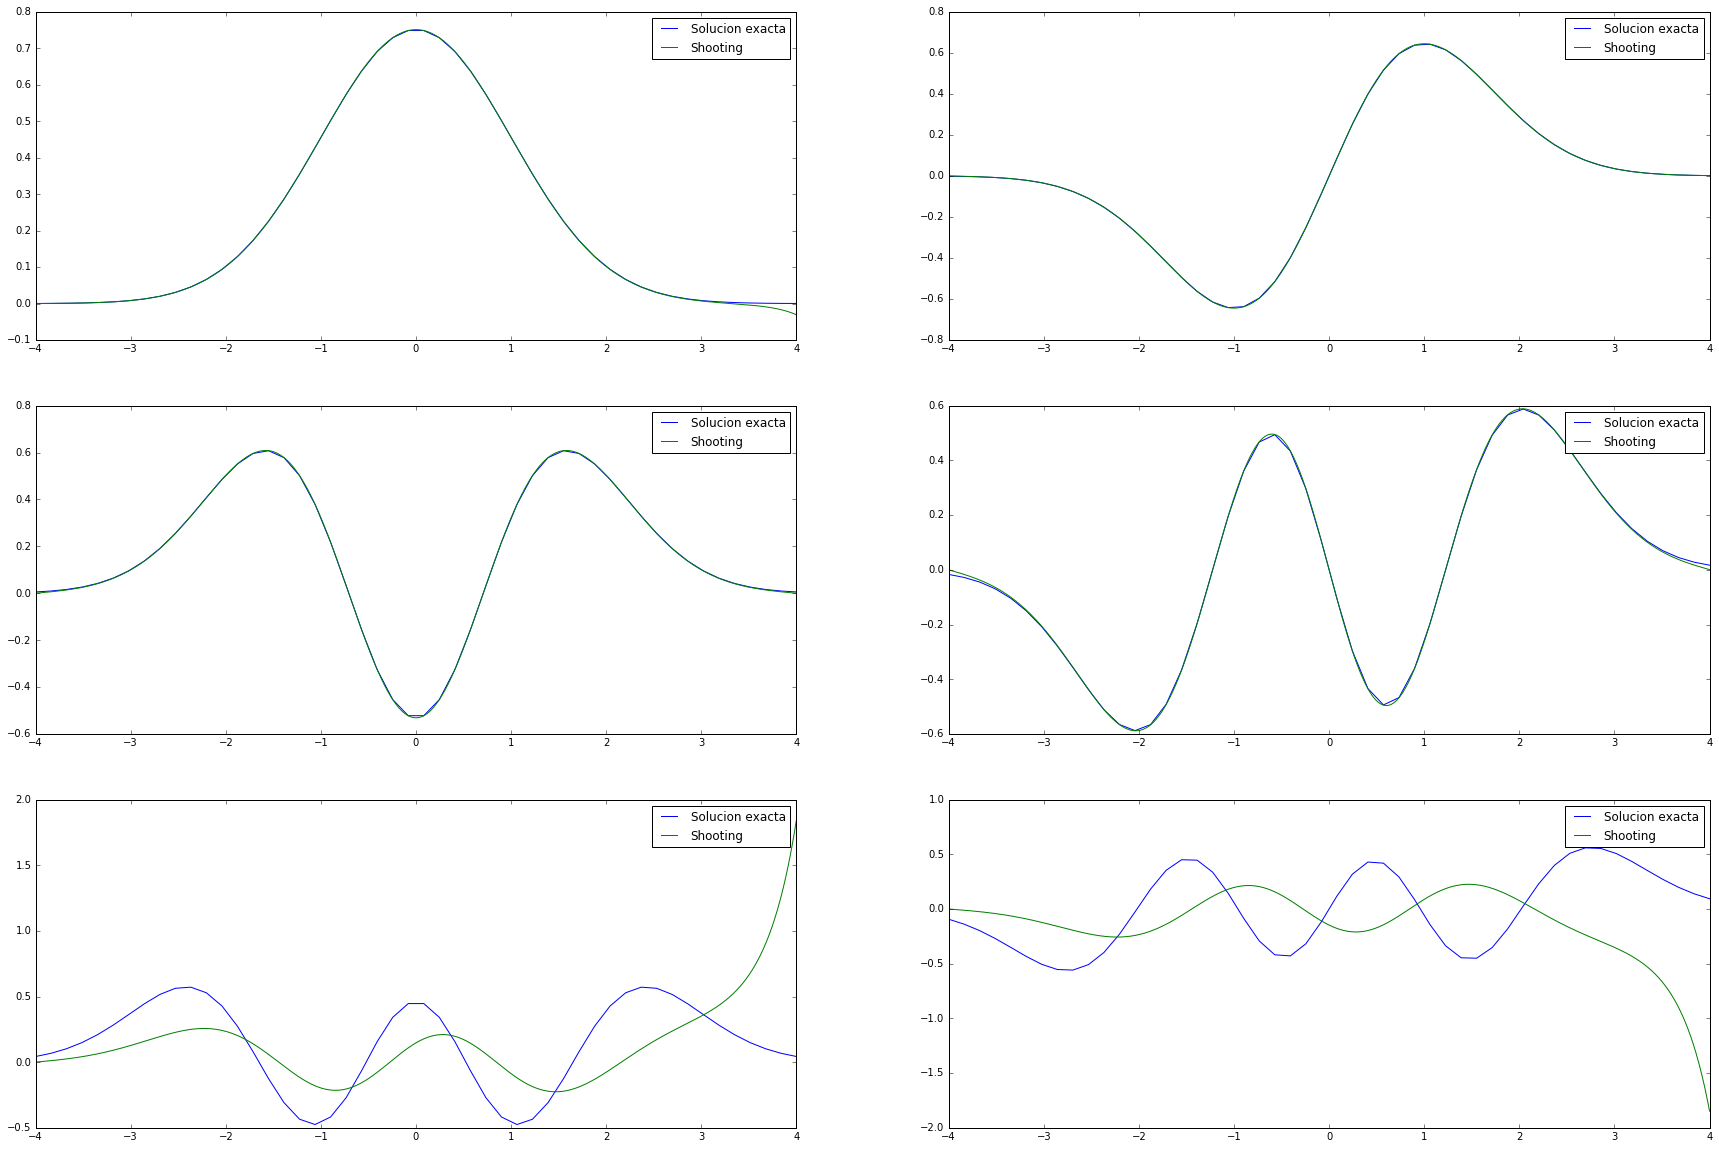

In [147]:
fig = figure(figsize=(30,20))

base =fig.add_subplot(321)
primero = fig.add_subplot(322)
segundo = fig.add_subplot(323)
tercero = fig.add_subplot(324)
cuarto =  fig.add_subplot(325)
quinto = fig.add_subplot(326)

graficas = [base, primero, segundo, tercero, cuarto, quinto]
titulos = ["Estado base", "Primer estado excitado", "Segundo estado excitado", "Tercer estado excitado","4to" ,"5to" ]

y=linspace(x_0,x_1)
for i in range(6):
    #graficas[i].plot(x,(-1)**i*funciones[i], label = "Numerov")  #El (-1) es para dar la paridad correcta
    graficas[i].plot(y,funcion_osc(y,i), label = "Solucion exacta")
    graficas[i].plot(xs,(-1)**i*f_s[i], label = "Shooting") 
    graficas[i].legend()
    #graficas[i].set_title("Energia=%s" %Energias[i])

# Átomo de hidrógeno con energías desconocidas

In [5]:
def V_hidrogeno(r,l):
    V = l*(l+1)/r**2-1/(4*pi*r)
    return V

# Oscilador anarmónico

Tratamos a continuación el potencial de oscilador anarmónico, que tiene la forma
$$
V(x) = \frac{m (\omega^2 x^2+gx^4)}{2}
$$

con g algún parámetro fijo que determina que tan fuerte es el término anarmónico.

In [38]:
omega = 1

def V_oscilador_ana(x,a =0.05 ,o = omega):
    V = o**2*x**2/2+a*x**4
    return V

In [39]:
x_0 = -2
x_1 =2
E = [0.5,11]
e_s = []
f_s = []
for i in range(10):
    en,xs,f = Numerov_ii(V_oscilador_ana,[x_0,x_1], E,[0,.01],"Shooting",i,args = "0",h=0.01,prec = 10**(-5) ,error = 1)

    e_s.append(en)
    f_s.append(f)
print(e_s)

[0.5579986572265625, 1.8355712890625, 3.5146484375, 5.708984375, 8.498046875, 10.999994993209839, 10.999994993209839, 10.999994993209839, 10.999994993209839, 10.999994993209839]


En caso del átomo de hidrógeno   $V_E = \frac{-e^2}{4 \pi \epsilon_0 r}+ \frac{l(l+1)}{r^2}$. La energía del átomo de hidrógeno es $E_n = -\frac{m}{2 \hbar^2 n^2}(\frac{e^2}{4 \pi \epsilon_0})^2 = -\frac{1}{2}(\frac{1}{4 \pi n})^2$. Recordamos también que $l<n$ y $|m|<=l$
No podemos resolver esta ecuación en un dominio infinito. Dado que para la mayoría de los potenciales se cumple que $\psi(x) \rightarrow 0$ si $|x| \rightarrow \infty$ como aproximación elegiremos los puntos extremos del dominio de integración tal que estén lo suficientemente lejos de la región donde la función de onda no se puede aproximar a cero.

Ventajas sobre Runge-Kutta de orden 4: Tiene un error de orden más alto  y no demanda tantos pasos para obtener el resultado.

# Matching Point

Se encuentra un punto donde se unirán las dos soluciones. La condición de que la solución sea continua es trivial.